## Análisis de datos - Clase 6

# Taller práctico - análisis de un dataset
### Tratamiento de datos faltantes y outliers

In [5206]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import json
import missingno as msno

---
### Importo el dataset procesado en la notebook 1 con los cambios de dtype
---

In [5207]:
# Leer el JSON
with open("../datasets/carreras_24_1_dtypes.json", "r") as f:
    info = json.load(f)

dtypes_str = info["dtypes"]
categorical_cols = info["categoricals"]

# Detectar columnas especiales
parse_dates = [col for col, dtype in dtypes_str.items() if "datetime" in dtype]
timedeltas = [col for col, dtype in dtypes_str.items() if "timedelta" in dtype]

# Convertir strings de tipo a los tipos correctos
def convertir_dtype(dtype_str):
    if dtype_str.startswith("int"): return "Int64"
    if dtype_str.startswith("float"): return "float"
    if dtype_str == "object": return "string"
    if dtype_str == "bool": return "boolean"
    return "string"

normal_dtypes = {col: convertir_dtype(dtype) for col, dtype in dtypes_str.items()
                 if col not in parse_dates + timedeltas + categorical_cols}


# leer CSV
carreras_24 = pd.read_csv("../datasets/carreras_24_1.csv", parse_dates=parse_dates, dtype=normal_dtypes)


# Restaurar timedelta
for col in timedeltas:
    carreras_24[col] = pd.to_timedelta(carreras_24[col])

# Restaurar categoricals
for col in categorical_cols:
    carreras_24[col] = carreras_24[col].astype("category")


carreras_24.head()

,EventName,EventDate,Driver,DriverNumber,Team,PitInTime,PitOutTime,IsPersonalBest,Stint,LapTime,...,Humidity,Compound,TyreLife,FreshTyre,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,Bahrain Grand Prix,2024-03-02,VER,1,Red Bull Racing,NaT,NaT,False,1.0,97.284,...,49.0,SOFT,4.0,False,12,1.0,False,NaN,False,False
1,Bahrain Grand Prix,2024-03-02,LEC,16,Ferrari,NaT,NaT,False,1.0,98.271,...,49.0,SOFT,4.0,False,12,2.0,False,NaN,False,False
2,Bahrain Grand Prix,2024-03-02,RUS,63,Mercedes,NaT,NaT,False,1.0,99.228,...,49.0,SOFT,4.0,False,12,3.0,False,NaN,False,False
3,Bahrain Grand Prix,2024-03-02,NOR,4,McLaren,NaT,NaT,False,1.0,102.168,...,49.0,SOFT,4.0,False,12,7.0,False,NaN,False,False
4,Bahrain Grand Prix,2024-03-02,HAM,44,Mercedes,NaT,NaT,False,1.0,103.122,...,49.0,SOFT,4.0,False,12,9.0,False,NaN,False,False


In [5208]:
carreras_24.shape

(26606, 32)

In [5209]:
carreras_24.columns

Index(['EventName', 'EventDate', 'Driver', 'DriverNumber', 'Team', 'PitInTime',
       'PitOutTime', 'IsPersonalBest', 'Stint', 'LapTime', 'LapNumber',
       'LapStartTime', 'LapStartDate', 'Sector1Time', 'Sector2Time',
       'Sector3Time', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'AirTemp',
       'TrackTemp', 'Humidity', 'Compound', 'TyreLife', 'FreshTyre',
       'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate'],
      dtype='object')

In [5210]:
carreras_24.head(10)

,EventName,EventDate,Driver,DriverNumber,Team,PitInTime,PitOutTime,IsPersonalBest,Stint,LapTime,...,Humidity,Compound,TyreLife,FreshTyre,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,Bahrain Grand Prix,2024-03-02,VER,1,Red Bull Racing,NaT,NaT,False,1.0,97.284,...,49.0,SOFT,4.0,False,12,1.0,False,NaN,False,False
1,Bahrain Grand Prix,2024-03-02,LEC,16,Ferrari,NaT,NaT,False,1.0,98.271,...,49.0,SOFT,4.0,False,12,2.0,False,NaN,False,False
2,Bahrain Grand Prix,2024-03-02,RUS,63,Mercedes,NaT,NaT,False,1.0,99.228,...,49.0,SOFT,4.0,False,12,3.0,False,NaN,False,False
3,Bahrain Grand Prix,2024-03-02,NOR,4,McLaren,NaT,NaT,False,1.0,102.168,...,49.0,SOFT,4.0,False,12,7.0,False,NaN,False,False
4,Bahrain Grand Prix,2024-03-02,HAM,44,Mercedes,NaT,NaT,False,1.0,103.122,...,49.0,SOFT,4.0,False,12,9.0,False,NaN,False,False
5,Bahrain Grand Prix,2024-03-02,PIA,81,McLaren,NaT,NaT,False,1.0,102.523,...,49.0,SOFT,4.0,False,12,8.0,False,NaN,False,False
6,Bahrain Grand Prix,2024-03-02,ALO,14,Aston Martin,NaT,NaT,False,1.0,101.679,...,49.0,SOFT,4.0,False,12,6.0,False,NaN,False,False
7,Bahrain Grand Prix,2024-03-02,SAR,2,Williams,NaT,NaT,False,1.0,105.921,...,49.0,SOFT,1.0,True,12,15.0,False,NaN,False,False
8,Bahrain Grand Prix,2024-03-02,SAI,55,Ferrari,NaT,NaT,False,1.0,100.620,...,49.0,SOFT,4.0,False,12,5.0,False,NaN,False,False
9,Bahrain Grand Prix,2024-03-02,ZHO,24,Kick Sauber,NaT,NaT,False,1.0,104.801,...,49.0,SOFT,1.0,True,12,13.0,False,NaN,False,False


In [5211]:
carreras_24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26606 entries, 0 to 26605
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   EventName        26606 non-null  category       
 1   EventDate        26606 non-null  datetime64[ns] 
 2   Driver           26606 non-null  category       
 3   DriverNumber     26606 non-null  category       
 4   Team             26606 non-null  category       
 5   PitInTime        849 non-null    timedelta64[ns]
 6   PitOutTime       840 non-null    timedelta64[ns]
 7   IsPersonalBest   26591 non-null  category       
 8   Stint            26606 non-null  category       
 9   LapTime          26381 non-null  float64        
 10  LapNumber        26606 non-null  Int64          
 11  LapStartTime     26606 non-null  float64        
 12  LapStartDate     26591 non-null  datetime64[ns] 
 13  Sector1Time      26066 non-null  float64        
 14  Sector2Time      26574

In [5212]:
carreras_24.describe(include='category')

,EventName,Driver,DriverNumber,Team,IsPersonalBest,Stint,Compound,TyreLife,FreshTyre,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
count,26606,26606,26606,26606,26591,26606.0,26606,26606.0,26606,26606,26578.0,26606,326,26606,26606
unique,24,24,25,10,2,5.0,6,78.0,2,25,20.0,2,255,2,2
top,Dutch Grand Prix,PIA,81,McLaren,False,2.0,HARD,4.0,True,1,6.0,False,TRACK LIMITS AT TURN 1 LAP 10,False,True
freq,1426,1444,1444,2881,21094,11438.0,13767,1162.0,21042,24604,1444.0,26280,5,26578,23557


---
## Datos faltantes
---

#### Calculo el total de datos faltantes

In [5213]:
# Serie con los valores faltantes
faltantes = carreras_24.isna().sum()

# Calculamos porcentaje de valores faltantes
total_filas = len(carreras_24)
faltantes_df = faltantes.to_frame(name='faltantes')
faltantes_df['porcentaje'] = ((faltantes_df['faltantes'] / total_filas) * 100).round(2)
faltantes_df = faltantes_df.sort_values(by='faltantes', ascending=False)

# Mostramos solo las que tienen valores faltantes
faltantes_df[faltantes_df['faltantes'] > 0]

,faltantes,porcentaje
DeletedReason,26280,98.77
PitOutTime,25766,96.84
PitInTime,25757,96.81
SpeedI1,4146,15.58
SpeedST,2184,8.21
SpeedFL,878,3.30
Sector1Time,540,2.03
LapTime,225,0.85
SpeedI2,54,0.20
Sector3Time,53,0.20


<Axes: >

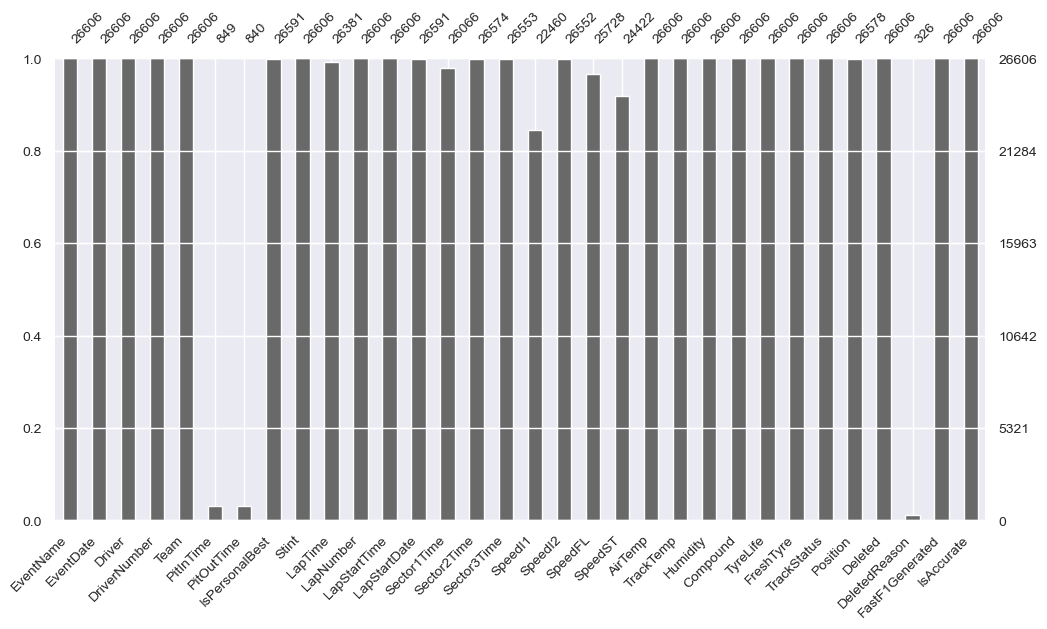

In [5214]:
msno.bar(carreras_24, figsize=(12, 6), fontsize=10)

<Axes: >

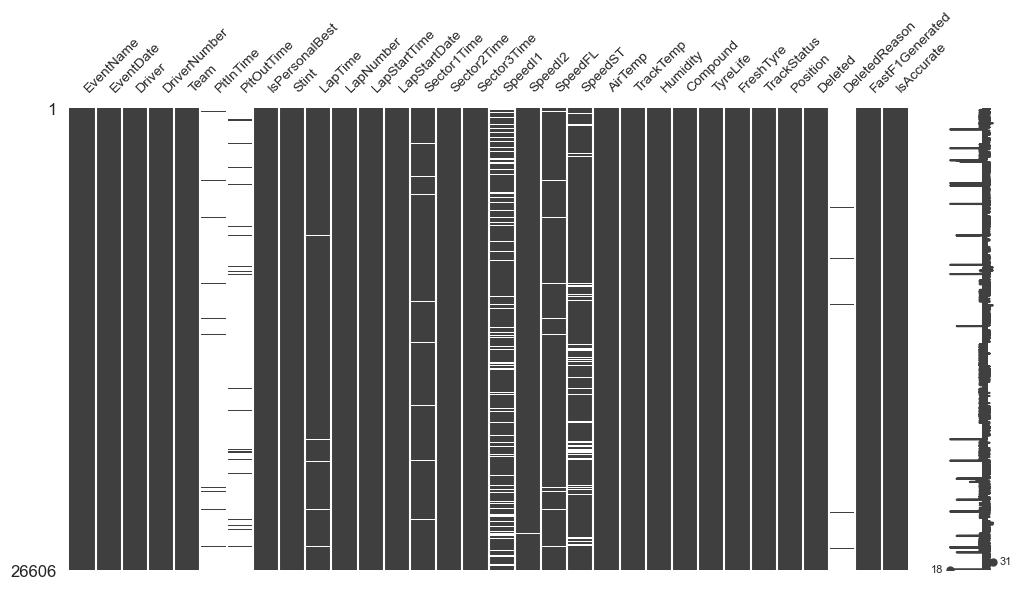

In [5215]:
msno.matrix(carreras_24, figsize=(12, 6), sparkline=True, fontsize=10)

<Axes: >

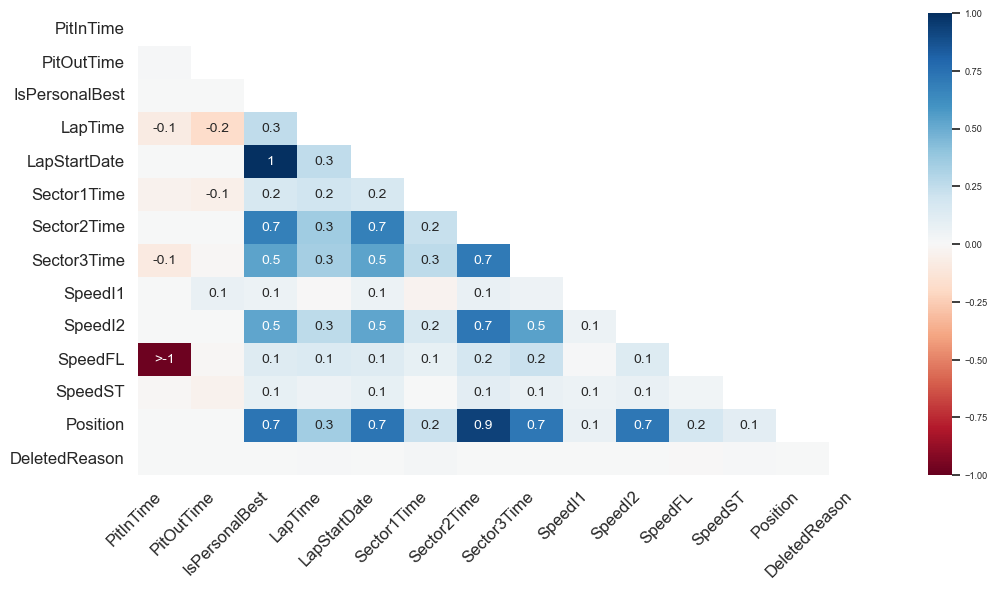

In [5216]:
msno.heatmap(carreras_24, figsize=(12, 6), fontsize=12)

Obs: 
* Sector1Time tiene 2% de datos faltantes pero no parece tener relación sustancial con los faltantes de ninguna otra columna.
* Sector2Time y 3 tienen muy pocos datos faltantes, y parecen estar relacionados con algunas variables.

<Axes: >

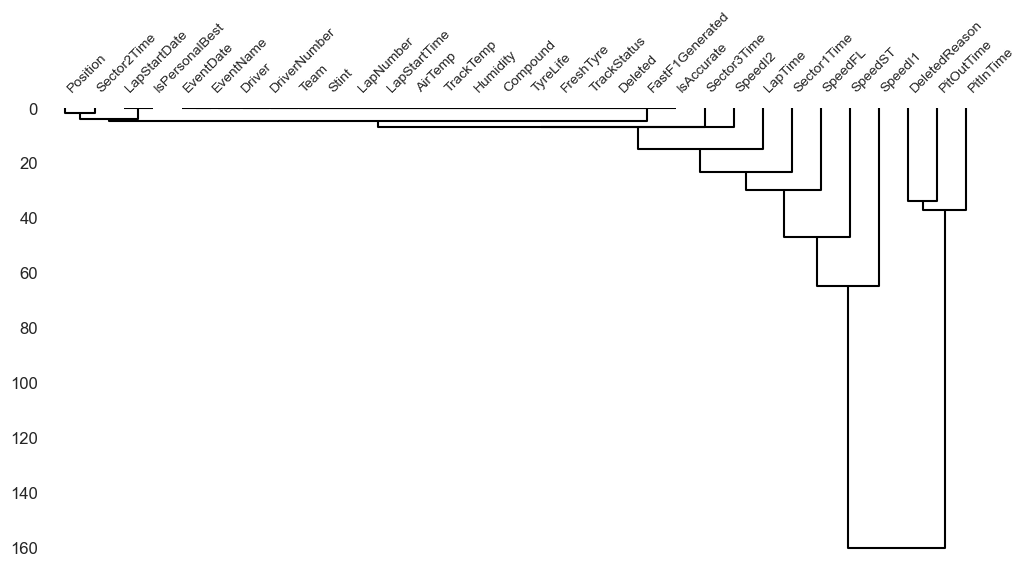

In [5217]:
msno.dendrogram(carreras_24, figsize=(12, 6), fontsize=10)

#### Nulos en DeletedReason (Aparentemente no relacionada con el resto de las columnas)

In [5218]:
print(f"Total de filas del dataset: {carreras_24.shape[0]}")
print(f"Cantidad de filas donde Deleted=True y DeletedReason=NaN: {carreras_24[(carreras_24['Deleted']==True) & carreras_24['DeletedReason'].isna()].shape[0]}")
print(f"Cantidad de filas donde Deleted=False y DeletedReason=Not NaN: {carreras_24[(carreras_24['Deleted']==False) & carreras_24['DeletedReason'].notna()].shape[0]}")
print(f"Cantidad de filas donde Deleted=True y DeletedReason=Not NaN: {carreras_24[(carreras_24['Deleted']==True) & carreras_24['DeletedReason'].notna()].shape[0]}")
print(f"Cantidad de filas donde Deleted=False y DeletedReason=NaN: {carreras_24[(carreras_24['Deleted']==False) & carreras_24['DeletedReason'].isna()].shape[0]}")

Total de filas del dataset: 26606
Cantidad de filas donde Deleted=True y DeletedReason=NaN: 0
Cantidad de filas donde Deleted=False y DeletedReason=Not NaN: 0
Cantidad de filas donde Deleted=True y DeletedReason=Not NaN: 326
Cantidad de filas donde Deleted=False y DeletedReason=NaN: 26280


Conclusión: DeletedReason es no nula únicamente cuando Deleted = True (cuando le anularon la vuelta al corredor por alguna infracción). Entonces no son realmente datos faltantes, sino datos que no se registran cuando la vuelta es válida.

In [5219]:
carreras_24['DeletedReason'] = carreras_24['DeletedReason'].cat.add_categories(['NotDeleted'])
carreras_24['DeletedReason'] = carreras_24['DeletedReason'].fillna('NotDeleted')


In [5220]:
carreras_24.describe(include='category')

,EventName,Driver,DriverNumber,Team,IsPersonalBest,Stint,Compound,TyreLife,FreshTyre,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
count,26606,26606,26606,26606,26591,26606.0,26606,26606.0,26606,26606,26578.0,26606,26606,26606,26606
unique,24,24,25,10,2,5.0,6,78.0,2,25,20.0,2,256,2,2
top,Dutch Grand Prix,PIA,81,McLaren,False,2.0,HARD,4.0,True,1,6.0,False,NotDeleted,False,True
freq,1426,1444,1444,2881,21094,11438.0,13767,1162.0,21042,24604,1444.0,26280,26280,26578,23557


#### Ya solucionamos DeletedReason, ahora hacemos análisis de nulos de PitInTime y PitOutTime 

Hasta el 2024, los pilotos estaban obligados a hacer al menos 1 parada en boxes por carrera (cambió a 2 en 2025). 

Los datos de PitInTime y PitOutTime son nulos para las vueltas que no tienen parada en boxes. Esto es esperable por diseño (no son realmente faltantes)

¿Qué hacemos en este caso?
- Opción 1: reemplazar con 0s los nulos. Problema: son columnas que indican tiempos!
- Opción 2: crear 2 nuevas columnas: Pit (True/False) y PitTime (PitInTime - PitOutTime). PitTime tendrá valores 0 para aquellas vueltas que no tienen parada en boxes. PitInTime y PitOutTime se mantienen como están (dejamos los nulos).

In [5221]:
# Cantidad de filas que no tienen nulos
PitInTime_no_nulos = total_filas-faltantes['PitInTime']
PitOutTime_no_nulos = total_filas-faltantes['PitOutTime']

print(f'Cantidad de entradas a boxes: {PitInTime_no_nulos}, cantidad de salidas de boxes: {PitOutTime_no_nulos}')

Cantidad de entradas a boxes: 849, cantidad de salidas de boxes: 840


In [5222]:
carreras_24[(carreras_24['PitInTime'].notnull()) & (carreras_24['PitOutTime'].notnull())]

,EventName,EventDate,Driver,DriverNumber,Team,PitInTime,PitOutTime,IsPersonalBest,Stint,LapTime,...,Humidity,Compound,TyreLife,FreshTyre,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
3245,Japanese Grand Prix,2024-04-07,ZHO,24,Kick Sauber,0 days 01:52:08.494000,0 days 01:50:27.076000,False,4.0,128.193,...,40.0,HARD,5.0,False,1,18.0,False,NotDeleted,False,False
6252,Emilia Romagna Grand Prix,2024-05-19,ALB,23,Williams,0 days 01:09:28.708000,0 days 01:07:15.914000,False,2.0,NaN,...,51.0,HARD,1.0,True,1,20.0,False,NotDeleted,False,False
23058,São Paulo Grand Prix,2024-11-03,ZHO,24,Kick Sauber,0 days 01:53:35.972000,0 days 01:51:55.386000,False,2.0,126.376,...,86.0,INTERMEDIATE,1.0,True,671,17.0,False,NotDeleted,False,False
23119,São Paulo Grand Prix,2024-11-03,HUL,27,Haas F1 Team,0 days 02:01:05.310000,0 days 01:58:44.080000,False,4.0,NaN,...,89.0,INTERMEDIATE,1.0,True,45,18.0,False,NotDeleted,False,False
23127,São Paulo Grand Prix,2024-11-03,ZHO,24,Kick Sauber,0 days 02:23:53.295000,0 days 02:22:03.366000,False,4.0,NaN,...,90.0,INTERMEDIATE,1.0,True,51,16.0,False,NotDeleted,False,False
23915,Las Vegas Grand Prix,2024-11-23,OCO,31,Alpine,0 days 01:16:55.566000,0 days 01:15:16.298000,False,2.0,114.887,...,51.0,MEDIUM,12.0,False,1,15.0,False,NotDeleted,False,False
24773,Qatar Grand Prix,2024-12-01,STR,18,Aston Martin,0 days 01:10:57.663000,0 days 01:09:18.818000,False,3.0,140.862,...,54.0,HARD,1.0,True,1,18.0,False,NotDeleted,False,False
25230,Qatar Grand Prix,2024-12-01,HAM,44,Mercedes,0 days 01:50:51.672000,0 days 01:48:31.837000,False,2.0,NaN,...,57.0,HARD,1.0,False,4,16.0,False,NotDeleted,False,False
25231,Qatar Grand Prix,2024-12-01,VER,1,Red Bull Racing,0 days 01:50:50.228000,0 days 01:48:29.321000,False,2.0,NaN,...,57.0,HARD,1.0,True,4,1.0,False,NotDeleted,False,False
25232,Qatar Grand Prix,2024-12-01,NOR,4,McLaren,0 days 01:50:54.535000,0 days 01:48:33.018000,False,2.0,NaN,...,57.0,HARD,1.0,True,4,2.0,False,NotDeleted,False,False


#### Ejemplo de salida a boxes

In [5223]:
carreras_24[carreras_24['Driver']=='ALB'][['LapNumber','PitOutTime','PitInTime', 'EventName']].head(30)

,LapNumber,PitOutTime,PitInTime,EventName
12,1,NaT,NaT,Bahrain Grand Prix
30,2,NaT,NaT,Bahrain Grand Prix
50,3,NaT,NaT,Bahrain Grand Prix
70,4,NaT,NaT,Bahrain Grand Prix
90,5,NaT,NaT,Bahrain Grand Prix
110,6,NaT,NaT,Bahrain Grand Prix
130,7,NaT,NaT,Bahrain Grand Prix
150,8,NaT,NaT,Bahrain Grand Prix
170,9,NaT,NaT,Bahrain Grand Prix
190,10,NaT,NaT,Bahrain Grand Prix


Creamos nueva variable 'PitTime_seconds' que guarda el tiempo de parada en boxes

In [5224]:
carreras_24 = carreras_24.sort_values(by=['EventName', 'Driver', 'LapNumber'])

# PitIn-Out
carreras_24['PitOutTime2'] = carreras_24.groupby(['EventName', 'Driver'], observed=True)['PitOutTime'].shift(-1)
carreras_24['PitTime'] = carreras_24['PitOutTime2'] - carreras_24['PitInTime']
carreras_24['PitTime_seconds'] = carreras_24['PitTime'].dt.total_seconds()

carreras_24.head()

,EventName,EventDate,Driver,DriverNumber,Team,PitInTime,PitOutTime,IsPersonalBest,Stint,LapTime,...,FreshTyre,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,PitOutTime2,PitTime,PitTime_seconds
25580,Abu Dhabi Grand Prix,2024-12-08,ALB,23,Williams,NaT,NaT,False,1.0,101.190,...,True,12,16.0,False,NotDeleted,False,False,NaT,NaT,NaN
25605,Abu Dhabi Grand Prix,2024-12-08,ALB,23,Williams,NaT,NaT,True,1.0,120.191,...,True,26,15.0,False,NotDeleted,False,False,NaT,NaT,NaN
25624,Abu Dhabi Grand Prix,2024-12-08,ALB,23,Williams,NaT,NaT,True,1.0,95.776,...,True,671,15.0,False,NotDeleted,False,False,NaT,NaT,NaN
25643,Abu Dhabi Grand Prix,2024-12-08,ALB,23,Williams,NaT,NaT,True,1.0,90.060,...,True,1,15.0,False,NotDeleted,False,True,NaT,NaT,NaN
25662,Abu Dhabi Grand Prix,2024-12-08,ALB,23,Williams,NaT,NaT,False,1.0,90.369,...,True,1,15.0,False,NotDeleted,False,True,NaT,NaT,NaN


In [5225]:
carreras_24.columns

Index(['EventName', 'EventDate', 'Driver', 'DriverNumber', 'Team', 'PitInTime',
       'PitOutTime', 'IsPersonalBest', 'Stint', 'LapTime', 'LapNumber',
       'LapStartTime', 'LapStartDate', 'Sector1Time', 'Sector2Time',
       'Sector3Time', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'AirTemp',
       'TrackTemp', 'Humidity', 'Compound', 'TyreLife', 'FreshTyre',
       'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate', 'PitOutTime2', 'PitTime',
       'PitTime_seconds'],
      dtype='object')

In [5226]:
# Verifico que la nueva columna PitTime tenga valores no nulos
carreras_24[(carreras_24['PitTime_seconds'].notna())].shape

(824, 35)

Aplico imputación con 0s a los NaN de 'PitTime_seconds' y creo una nueva variable binaria 'Pit' que indica si el piloto hizo una parada en boxes o no. 

In [5227]:
# Creo nueva variable binaria
carreras_24['Pit'] = np.where(carreras_24['PitTime_seconds'].isna(), False, True)

# Verifico que para no nulos en PitTime haya un True en Pit
carreras_24[(carreras_24['PitTime_seconds'].notna())].head(10)


,EventName,EventDate,Driver,DriverNumber,Team,PitInTime,PitOutTime,IsPersonalBest,Stint,LapTime,...,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,PitOutTime2,PitTime,PitTime_seconds,Pit
25794,Abu Dhabi Grand Prix,2024-12-08,ALB,23,Williams,0 days 01:15:40.720000,NaT,False,1.0,92.201,...,1,14.0,False,NotDeleted,False,False,0 days 01:16:02.774000,0 days 00:00:22.054000,22.054,True
25807,Abu Dhabi Grand Prix,2024-12-08,ALO,14,Aston Martin,0 days 01:17:02.713000,NaT,False,1.0,93.244,...,1,8.0,False,NotDeleted,False,False,0 days 01:17:26.460000,0 days 00:00:23.747000,23.747,True
26248,Abu Dhabi Grand Prix,2024-12-08,ALO,14,Aston Martin,0 days 01:53:23.943000,NaT,False,2.0,91.999,...,1,9.0,False,NotDeleted,False,False,0 days 01:53:46.293000,0 days 00:00:22.350000,22.350,True
25679,Abu Dhabi Grand Prix,2024-12-08,BOT,77,Kick Sauber,0 days 01:06:36.737000,NaT,False,1.0,93.388,...,1,16.0,False,NotDeleted,False,False,0 days 01:07:17.835000,0 days 00:00:41.098000,41.098,True
25627,Abu Dhabi Grand Prix,2024-12-08,COL,43,Williams,0 days 01:02:42.334000,NaT,False,1.0,130.710,...,671,19.0,False,NotDeleted,False,False,0 days 01:03:07.286000,0 days 00:00:24.952000,24.952,True
25981,Abu Dhabi Grand Prix,2024-12-08,DOO,61,Alpine,0 days 01:30:55.550000,NaT,False,1.0,93.037,...,1,13.0,False,NotDeleted,False,False,0 days 01:31:17.616000,0 days 00:00:22.066000,22.066,True
25821,Abu Dhabi Grand Prix,2024-12-08,GAS,10,Alpine,0 days 01:18:24.603000,NaT,False,1.0,92.241,...,1,4.0,False,NotDeleted,False,False,0 days 01:18:46.590000,0 days 00:00:21.987000,21.987,True
26190,Abu Dhabi Grand Prix,2024-12-08,HAM,44,Mercedes,0 days 01:48:31.010000,NaT,False,1.0,91.792,...,1,4.0,False,NotDeleted,False,False,0 days 01:48:52.703000,0 days 00:00:21.693000,21.693,True
25805,Abu Dhabi Grand Prix,2024-12-08,HUL,27,Haas F1 Team,0 days 01:16:58.954000,NaT,False,1.0,92.490,...,1,7.0,False,NotDeleted,False,False,0 days 01:17:20.529000,0 days 00:00:21.575000,21.575,True
25995,Abu Dhabi Grand Prix,2024-12-08,LAW,30,RB,0 days 01:32:17.724000,NaT,False,1.0,94.497,...,1,9.0,False,NotDeleted,False,False,0 days 01:32:41.180000,0 days 00:00:23.456000,23.456,True


In [5228]:
# Verifico que para nulos en PitTime haya un False en Pit
carreras_24[(carreras_24['PitTime_seconds'].isna())].head(10)


,EventName,EventDate,Driver,DriverNumber,Team,PitInTime,PitOutTime,IsPersonalBest,Stint,LapTime,...,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,PitOutTime2,PitTime,PitTime_seconds,Pit
25580,Abu Dhabi Grand Prix,2024-12-08,ALB,23,Williams,NaT,NaT,False,1.0,101.190,...,12,16.0,False,NotDeleted,False,False,NaT,NaT,NaN,False
25605,Abu Dhabi Grand Prix,2024-12-08,ALB,23,Williams,NaT,NaT,True,1.0,120.191,...,26,15.0,False,NotDeleted,False,False,NaT,NaT,NaN,False
25624,Abu Dhabi Grand Prix,2024-12-08,ALB,23,Williams,NaT,NaT,True,1.0,95.776,...,671,15.0,False,NotDeleted,False,False,NaT,NaT,NaN,False
25643,Abu Dhabi Grand Prix,2024-12-08,ALB,23,Williams,NaT,NaT,True,1.0,90.060,...,1,15.0,False,NotDeleted,False,True,NaT,NaT,NaN,False
25662,Abu Dhabi Grand Prix,2024-12-08,ALB,23,Williams,NaT,NaT,False,1.0,90.369,...,1,15.0,False,NotDeleted,False,True,NaT,NaT,NaN,False
25681,Abu Dhabi Grand Prix,2024-12-08,ALB,23,Williams,NaT,NaT,False,1.0,90.815,...,1,14.0,False,NotDeleted,False,True,NaT,NaT,NaN,False
25699,Abu Dhabi Grand Prix,2024-12-08,ALB,23,Williams,NaT,NaT,False,1.0,90.317,...,1,14.0,False,NotDeleted,False,True,NaT,NaT,NaN,False
25718,Abu Dhabi Grand Prix,2024-12-08,ALB,23,Williams,NaT,NaT,False,1.0,90.705,...,1,14.0,False,NotDeleted,False,True,NaT,NaT,NaN,False
25737,Abu Dhabi Grand Prix,2024-12-08,ALB,23,Williams,NaT,NaT,False,1.0,90.469,...,1,14.0,False,NotDeleted,False,True,NaT,NaT,NaN,False
25756,Abu Dhabi Grand Prix,2024-12-08,ALB,23,Williams,NaT,NaT,False,1.0,90.748,...,1,14.0,False,NotDeleted,False,True,NaT,NaT,NaN,False


In [5229]:
# Verifico que para nulos en PitTime haya un False en Pit
no_pit = len(carreras_24[(carreras_24['Pit']==0)])
is_pit = len(carreras_24[(carreras_24['Pit']==1)])
print(f"Cantidad de filas con Pit=False: {no_pit}")
print(f"Cantidad de filas con Pit=True: {is_pit}")
print(f"Total:{no_pit+is_pit}")

Cantidad de filas con Pit=False: 25782
Cantidad de filas con Pit=True: 824
Total:26606


In [5230]:
# Aplico imputación a los valores nulos 
carreras_24['PitTime_seconds'] = pd.to_numeric(carreras_24['PitTime_seconds'], errors='coerce').fillna(0)

# Verifico
carreras_24[(carreras_24['PitTime_seconds'].isna())].shape


(0, 36)

#### Ya solucionamos DeletedReason, PitInTime y PitOutTime. Ahora hacemos análisis de nulos de LapTime.

 Teniendo en cuenta que LapTime es la suma de los tramos Sector1Time, Sector2Time y Sector3Time, hay registros sin datos en absoluto?

In [5231]:
# Miro los tiempos. Hay información?
todo_nulo = carreras_24[['LapTime', 'Sector1Time', 'Sector2Time', 'Sector3Time']].isna().all(axis=1)
print(f"Cantidad de filas con los 4 campos nulos: {todo_nulo.sum()}")
carreras_24[todo_nulo]

Cantidad de filas con los 4 campos nulos: 29


,EventName,EventDate,Driver,DriverNumber,Team,PitInTime,PitOutTime,IsPersonalBest,Stint,LapTime,...,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,PitOutTime2,PitTime,PitTime_seconds,Pit
26585,Abu Dhabi Grand Prix,2024-12-08,LAW,30,RB,NaT,NaT,NaN,4.0,NaN,...,12,NaN,False,NotDeleted,True,False,NaT,NaT,0.0,False
25586,Abu Dhabi Grand Prix,2024-12-08,PER,11,Red Bull Racing,NaT,NaT,False,1.0,NaN,...,12,NaN,False,NotDeleted,True,False,NaT,NaT,0.0,False
2314,Australian Grand Prix,2024-03-24,HAM,44,Mercedes,NaT,NaT,NaN,2.0,NaN,...,12,NaN,False,NotDeleted,True,False,NaT,NaT,0.0,False
3008,Australian Grand Prix,2024-03-24,RUS,63,Mercedes,NaT,NaT,NaN,3.0,NaN,...,1,NaN,False,NotDeleted,True,False,NaT,NaT,0.0,False
19073,Azerbaijan Grand Prix,2024-09-15,PER,11,Red Bull Racing,NaT,NaT,NaN,2.0,NaN,...,1,NaN,False,NotDeleted,True,False,NaT,NaT,0.0,False
19074,Azerbaijan Grand Prix,2024-09-15,SAI,55,Ferrari,NaT,NaT,NaN,2.0,NaN,...,1,NaN,False,NotDeleted,True,False,NaT,NaT,0.0,False
12559,British Grand Prix,2024-07-07,GAS,10,Alpine,NaT,NaT,False,1.0,NaN,...,1,NaN,False,NotDeleted,True,False,NaT,NaT,0.0,False
9563,Canadian Grand Prix,2024-06-09,ALB,23,Williams,NaT,NaT,NaN,3.0,NaN,...,12,NaN,False,NotDeleted,True,False,NaT,NaT,0.0,False
9033,Canadian Grand Prix,2024-06-09,SAR,2,Williams,NaT,NaT,NaN,1.0,NaN,...,1,NaN,False,NotDeleted,True,False,NaT,NaT,0.0,False
4325,Chinese Grand Prix,2024-04-21,BOT,77,Kick Sauber,NaT,NaT,NaN,2.0,NaN,...,12,NaN,False,NotDeleted,True,False,NaT,NaT,0.0,False


#### Entonces:

- ¿Qué tipo de error es este?
- ¿Vale la pena imputar todos estos datos? O es mejor descartar estas 29 filas (representan un 0,1% del dataset)?


In [5232]:
carreras_24.shape # antes

(26606, 36)

In [5233]:
# Decidimos descartarlos:
todo_nulo = carreras_24[['LapTime', 'Sector1Time', 'Sector2Time', 'Sector3Time']].isna().all(axis=1)
carreras_24 = carreras_24[~todo_nulo]
carreras_24.shape # despues

(26577, 36)

#### La siguiente cosa que podemos hacer es analizar las filas con LapTime nulo que tienen Sector1Time, Sector2Time o Sector3Time no nulos, porque con esos datos podríamos calcular el LapTime (es la suma de los 3 sectores).

In [5234]:
carreras_24[carreras_24['LapTime'].isna() & carreras_24['Sector1Time'].notna() & carreras_24['Sector2Time'].notna() & carreras_24['Sector3Time'].notna()].shape[0]


144

Entonces, hay 144 filas que podrían ser calculadas a partir de los tiempos de los sectores.

In [5235]:
# Imputar LapTime cuando los 3 tramos están disponibles

def imputar_laptime_con_sectores(row):
    if pd.isna(row['LapTime']) and pd.notna(row['Sector1Time']) and pd.notna(row['Sector2Time']) and pd.notna(row['Sector3Time']):
        return row['Sector1Time'] + row['Sector2Time'] + row['Sector3Time']
    return row['LapTime']

# Aplicar la imputación en la columna
carreras_24['LapTime'] = carreras_24.apply(imputar_laptime_con_sectores, axis=1)


In [5236]:
print(f"Después de imputar, me quedaron {carreras_24['LapTime'].isna().sum()} nulos")

Después de imputar, me quedaron 52 nulos


#### Esos 52 nulos los podemos imputar si imputamos primero los faltantes de cada sector:

In [5237]:
carreras_24[['Sector1Time','Sector2Time','Sector3Time']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 26577 entries, 25580 to 21332
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sector1Time  26066 non-null  float64
 1   Sector2Time  26574 non-null  float64
 2   Sector3Time  26553 non-null  float64
dtypes: float64(3)
memory usage: 830.5 KB


¿Qué tipo de faltantes son? ¿Hay algú patrón?

In [5238]:
carreras_24[carreras_24['Sector1Time'].isna()][['Driver','EventName','LapTime','LapNumber', 'Sector1Time','Sector2Time','Sector3Time', 'Pit', 'Deleted', 'Position', 'TrackStatus']]

,Driver,EventName,LapTime,LapNumber,Sector1Time,Sector2Time,Sector3Time,Pit,Deleted,Position,TrackStatus
25580,ALB,Abu Dhabi Grand Prix,101.190,1,NaN,40.443,35.860,False,False,16.0,12
25589,ALO,Abu Dhabi Grand Prix,96.166,1,NaN,39.033,33.904,False,False,7.0,12
25572,BOT,Abu Dhabi Grand Prix,100.183,1,NaN,41.546,35.018,False,False,14.0,12
25583,COL,Abu Dhabi Grand Prix,102.506,1,NaN,40.478,36.748,False,False,19.0,12
25574,DOO,Abu Dhabi Grand Prix,101.564,1,NaN,40.549,35.991,False,False,17.0,12
...,...,...,...,...,...,...,...,...,...,...,...
20295,SAI,United States Grand Prix,102.273,1,NaN,39.891,33.748,False,False,3.0,12
20296,STR,United States Grand Prix,108.520,1,NaN,42.404,34.573,False,False,13.0,12
20291,TSU,United States Grand Prix,105.613,1,NaN,40.939,34.054,False,False,8.0,12
20281,VER,United States Grand Prix,101.657,1,NaN,40.291,33.295,False,False,2.0,12


Obs: parece que hay un patrón asociado a ciertas carreras y vueltas. 

Analizamos más en detalle aplicando filtros:

In [5239]:
missing_laptime = carreras_24[carreras_24['Sector1Time'].isna()]

missing_laptime[['Driver','EventName','LapTime','LapNumber', 'Sector1Time','Sector2Time','Sector3Time', 'Pit', 'Deleted', 'Position', 'TrackStatus']]

,Driver,EventName,LapTime,LapNumber,Sector1Time,Sector2Time,Sector3Time,Pit,Deleted,Position,TrackStatus
25580,ALB,Abu Dhabi Grand Prix,101.190,1,NaN,40.443,35.860,False,False,16.0,12
25589,ALO,Abu Dhabi Grand Prix,96.166,1,NaN,39.033,33.904,False,False,7.0,12
25572,BOT,Abu Dhabi Grand Prix,100.183,1,NaN,41.546,35.018,False,False,14.0,12
25583,COL,Abu Dhabi Grand Prix,102.506,1,NaN,40.478,36.748,False,False,19.0,12
25574,DOO,Abu Dhabi Grand Prix,101.564,1,NaN,40.549,35.991,False,False,17.0,12
...,...,...,...,...,...,...,...,...,...,...,...
20295,SAI,United States Grand Prix,102.273,1,NaN,39.891,33.748,False,False,3.0,12
20296,STR,United States Grand Prix,108.520,1,NaN,42.404,34.573,False,False,13.0,12
20291,TSU,United States Grand Prix,105.613,1,NaN,40.939,34.054,False,False,8.0,12
20281,VER,United States Grand Prix,101.657,1,NaN,40.291,33.295,False,False,2.0,12


In [5240]:
# Agrupamos los faltantes del sector 1 por numero de vuelta
missing_laptime.groupby(['LapNumber'], observed=False).size().reset_index(name='Conteo').sort_values(by='Conteo', ascending=False)


,LapNumber,Conteo
0,1,465
1,2,18
9,33,15
2,3,6
6,27,2
3,6,1
4,8,1
5,11,1
7,31,1
8,32,1


Obs: la mayoría de los faltantes suceden en la vuelta 1.

¿Qué pasa con los nulos del sector 2?

In [5241]:
carreras_24[carreras_24['Sector2Time'].isna()][['Driver','EventName','LapTime','LapNumber', 'Sector1Time','Sector2Time','Sector3Time', 'Pit', 'Deleted', 'Position', 'TrackStatus']]

,Driver,EventName,LapTime,LapNumber,Sector1Time,Sector2Time,Sector3Time,Pit,Deleted,Position,TrackStatus
14913,ZHO,Belgian Grand Prix,NaN,3,31.343,NaN,38.281,False,False,20.0,1
21533,ALO,Mexico City Grand Prix,84.127,11,NaN,NaN,21.376,False,False,13.0,1
21440,GAS,Mexico City Grand Prix,115.050,6,NaN,NaN,34.459,False,False,9.0,41


¿Qué pasa con los nulos del sector 3?

In [5242]:
carreras_24[carreras_24['Sector3Time'].isna()][['Driver','EventName','LapTime','LapNumber', 'Sector1Time','Sector2Time','Sector3Time', 'Pit', 'Deleted', 'Position', 'TrackStatus']]

,Driver,EventName,LapTime,LapNumber,Sector1Time,Sector2Time,Sector3Time,Pit,Deleted,Position,TrackStatus
2088,VER,Australian Grand Prix,NaN,4,28.756,18.353,NaN,False,False,19.0,1
9360,LEC,Canadian Grand Prix,NaN,41,25.513,27.870,NaN,False,False,19.0,1
9547,PER,Canadian Grand Prix,NaN,52,23.452,43.873,NaN,False,False,17.0,12
9562,SAI,Canadian Grand Prix,NaN,53,23.012,55.514,NaN,False,False,15.0,124
7323,ALB,Monaco Grand Prix,2494.817,1,NaN,55.498,NaN,True,False,13.0,1254
7333,ALO,Monaco Grand Prix,2513.184,1,NaN,60.893,NaN,True,False,17.0,1254
7327,BOT,Monaco Grand Prix,2521.748,1,NaN,63.149,NaN,True,False,19.0,1254
7325,GAS,Monaco Grand Prix,2497.695,1,NaN,57.790,NaN,True,False,14.0,1254
7320,HAM,Monaco Grand Prix,2483.804,1,NaN,52.196,NaN,True,False,11.0,1254
7316,LEC,Monaco Grand Prix,2456.330,1,NaN,46.389,NaN,True,False,1.0,1254


Obs: a simple vista, parece que la mayoría ocurre en Mónaco en la vuelta 1.

Asumimos entonces que son faltantes MAR y como son pocos, podemos imputar con alguna estadística apropiada.

In [5243]:

# Imputar Sector1Time, Sector2Time y Sector3Time por la mediana del mismo EventName 
for sector in ['Sector1Time', 'Sector2Time', 'Sector3Time']:
    carreras_24[sector] = carreras_24[sector].fillna(
        carreras_24.groupby('EventName',observed=True)[sector].transform('median')
    )

# Vuelvo a aplicar la imputación en la columna LapTime para tratar los últimos faltantes.
carreras_24['LapTime'] = carreras_24.apply(imputar_laptime_con_sectores, axis=1)
#carreras_24.info()

In [5244]:
# Serie con los valores faltantes
faltantes = carreras_24.isna().sum()

# Calculamos porcentaje de valores faltantes
total_filas = len(carreras_24)
faltantes_df = faltantes.to_frame(name='faltantes')
faltantes_df['porcentaje'] = ((faltantes_df['faltantes'] / total_filas) * 100).round(2)
faltantes_df = faltantes_df.sort_values(by='faltantes', ascending=False)

# Mostramos solo las que tienen valores faltantes
faltantes_df[faltantes_df['faltantes'] > 0]

,faltantes,porcentaje
PitTime,25753,96.90
PitOutTime2,25753,96.90
PitOutTime,25737,96.84
PitInTime,25728,96.81
SpeedI1,4117,15.49
SpeedST,2155,8.11
SpeedFL,849,3.19
SpeedI2,25,0.09


Obs: los primeros 4 tienen NaN porque para el tratamiento creamos columnas nuevas. PitTime no la usamos, sino que usamos PitTime_seconds y Pit (True/False).
Las variables restantes no las trataremos en este análisis.

---
## Outliers
---

Estudio de outliers en PitTime_seconds

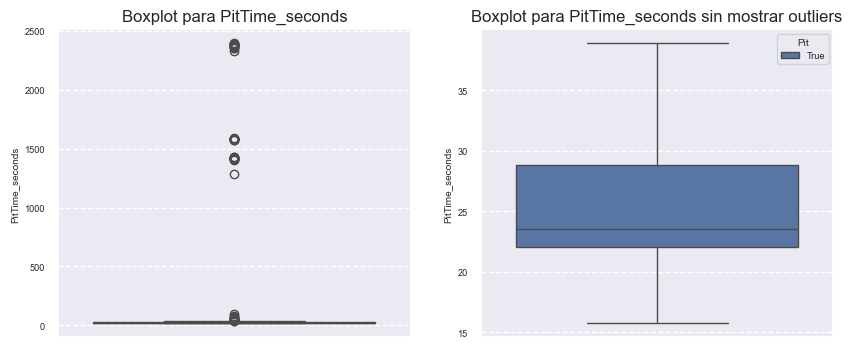

In [5245]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.boxplot(data=carreras_24[carreras_24['Pit']==True], y='PitTime_seconds', ax=ax[0])
sns.boxplot(data=carreras_24[carreras_24['Pit']==True], y='PitTime_seconds', hue='Pit', showfliers= False, ax=ax[1])       
ax[0].grid(axis='y', ls='--')
ax[0].set_title('Boxplot para PitTime_seconds', fontsize=12)
ax[1].grid(axis='y', ls='--')
ax[1].set_title('Boxplot para PitTime_seconds sin mostrar outliers', fontsize=12)

plt.show()

In [5246]:
carreras_24[carreras_24['PitTime_seconds'] > 500][['Driver', 'EventName', 'LapTime', 'Sector1Time', 'Sector2Time', 'Sector3Time','LapNumber', 'Pit', 'Deleted', 'Position', 'PitTime_seconds', 'TrackStatus']]

,Driver,EventName,LapTime,Sector1Time,Sector2Time,Sector3Time,LapNumber,Pit,Deleted,Position,PitTime_seconds,TrackStatus
3031,ALO,Japanese Grand Prix,140.526,35.318,69.943,32.569,1,True,False,7.0,1580.927,125
3040,BOT,Japanese Grand Prix,164.736,35.318,81.589,43.219,1,True,False,13.0,1582.254,125
3042,GAS,Japanese Grand Prix,173.223,35.318,85.099,47.334,1,True,False,16.0,1586.631,125
3034,HAM,Japanese Grand Prix,152.716,35.318,77.160,37.060,1,True,False,9.0,1580.802,125
3045,HUL,Japanese Grand Prix,162.853,35.318,80.740,42.423,1,True,False,12.0,1580.818,125
3029,LEC,Japanese Grand Prix,154.543,35.318,77.828,37.701,1,True,False,10.0,1583.228,125
3039,MAG,Japanese Grand Prix,185.172,35.318,88.402,55.147,1,True,False,18.0,1584.324,125
3030,NOR,Japanese Grand Prix,134.751,35.318,65.666,32.333,1,True,False,5.0,1580.107,125
3041,OCO,Japanese Grand Prix,170.167,35.318,84.316,45.396,1,True,False,15.0,1585.943,125
3046,PER,Japanese Grand Prix,132.767,35.318,65.032,31.841,1,True,False,4.0,1577.565,125


Obs:
* En la pista de Suzuka chocaron Ricciardo y Albon al comienzo en la vuelta 1 y hubo Red Flag.
* En Mónaco hubo Red Flag por choque en la vuelta 1 después de un choque entre Pérez, Hülkenberg y Magnussen.
* En Sao Paulo hubo Red Flag por el choque de Colapinto en la vuelta 32.



#### ¿Podemos asumir que son legítimos?

---
### Exportación para leer en la notebook 3 (preguntas)
---

In [ ]:
# Limpiamos categoricas con categorías no usadas
carreras_24['Compound'] = carreras_24['Compound'].cat.remove_unused_categories()

In [5248]:
import json

# Detectar columnas categóricas
categorical_cols = [col for col, dtype in carreras_24.dtypes.items() if str(dtype) == 'category']

# Guardar los tipos como strings
dtypes_str = {col: str(dtype) for col, dtype in carreras_24.dtypes.items()}

# Guardar todo en un solo JSON
info = {
    "dtypes": dtypes_str,
    "categoricals": categorical_cols
}

with open("../datasets/carreras_24_2_dtypes.json", "w") as f:
    json.dump(info, f)

# exportar CSV
carreras_24.to_csv('../datasets/carreras_24_2.csv', index=False)
